# Marketing Analytics

## Introduction 

### Context 
You're a analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

[Note : The Context was taken from this [Kaggle Dataset](https://www.kaggle.com/jackdaoud/marketing-data). So credits to the Task and Dataset provider. Thank You for sharing this project idea.]

### About the Data 
This dataset was provided to students for their final projects in a course called Advanced Data Analytics as part of the Master of Science Business Analytics program at Hult International Business School for the AY 20/21. It can be utilized for EDA, Statistical Analysis, and Visualizations.


### Dataset Content
The is a CSV file of 2240 observations (customers) with 28 variables related to marketing data. More specifically, the variables provide insights about:
- Customer profiles
- Product preferences
- Campaign successes/failures
- Channel performance

### Tasks
#### Section 1: Exploratory Data Analysis

- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any variables that warrant transformations?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

#### Section 2: Statistical Analysis

Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test. 
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)

#### Section 3: Data Visualization
Please plot and visualize the answers to the below questions.
- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?

##### Section 0 : Import and Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Import the Dataset File
mrkt = pd.read_csv('marketing_data.csv')
mrkt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [2]:
mrkt.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

##### More information on the Features was given with the dataset :
- ID: Customer’s unique identifier
- Year_Birth: Customer’s birth year
- Education: Customer’s education level
- Marital_Status: Customer’s marital status
- Income: Customer’s yearly household income
- Kidhome: Number of children in customer’s household
- Tennhome: Number of teenagers in customer’s household
- Dt_Customer: Date of customer’s enrollment with the company
- Recency: Number of days since customer’s last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchase: Number of purchases made with a discount
- NumWebPurchase: Number of purchases made through the company’s website
- NumCatalogPurchase: Number of purchases made using a catalog
- NumStorePurchase: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if a customer complained in the last 2 years, 0 otherwise
- Country: Customer’s location

In [3]:
#Lets define a function n
def dataset_info(mrkt):
    print("The dataset contains", mrkt.shape[1], "columns and", mrkt.shape[0], "rows.")
    print("The dataset has", mrkt[mrkt.duplicated()].shape[0], "duplicated rows.")
    print(" ")
    print("The Descriptive statistics of the dataset: ")
    print(" ")
    print(mrkt.describe().T)
    print(" ")
    print(" ")
    print("The Information about this DataFrame including the index dtype and columns, non-null values and memory usage.: ")
    print(" ")
    print(mrkt.info())

In [4]:
dataset_info(mrkt)

The dataset contains 28 columns and 2240 rows.
The dataset has 0 duplicated rows.
 
The Descriptive statistics of the dataset: 
 
                      count         mean          std     min      25%  \
ID                   2240.0  5592.159821  3246.662198     0.0  2828.25   
Year_Birth           2240.0  1968.805804    11.984069  1893.0  1959.00   
Kidhome              2240.0     0.444196     0.538398     0.0     0.00   
Teenhome             2240.0     0.506250     0.544538     0.0     0.00   
Recency              2240.0    49.109375    28.962453     0.0    24.00   
MntWines             2240.0   303.935714   336.597393     0.0    23.75   
MntFruits            2240.0    26.302232    39.773434     0.0     1.00   
MntMeatProducts      2240.0   166.950000   225.715373     0.0    16.00   
MntFishProducts      2240.0    37.525446    54.628979     0.0     3.00   
MntSweetProducts     2240.0    27.062946    41.280498     0.0     1.00   
MntGoldProds         2240.0    44.021875    52.167439   

#### There are few issues here:
- The Income column has multiple issues:
 - There is a space in front of the income's column name
 - There are dollar signs in the values of Income column
 - The "Income" column has 24 missing values
 - Income is a object datatype - need to change it into numerical feature
- Dt_Customer [which is a datetime] has a type of object - need to change it into a datetime feature


In [5]:
#Cleaning the Variables
#Rename the Income column
mrkt.rename({' Income ' : 'Income'}, axis = 1, inplace = True)

In [6]:
mrkt.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
#There are dollar signs,dots and commas is the values of Income column
mrkt['Income'] = mrkt['Income'].str.replace('$','')
mrkt['Income'] = mrkt['Income'].str.replace(',','')
mrkt['Income'] = mrkt['Income'].str.replace('00','')
mrkt['Income'] = mrkt['Income'].str.replace('.','')

In [8]:
mrkt['Income'].head()

0    84835 
1    57091 
2    67267 
3    32474 
4    21474 
Name: Income, dtype: object

In [9]:
# Convert Income type to float 
mrkt['Income'] = mrkt['Income'].astype(float)

In [10]:
mrkt['Income'].isnull().value_counts()

False    2216
True       24
Name: Income, dtype: int64

In [11]:
#Fill the null values in Income with its Mean values
mrkt['Income'] = mrkt['Income'].fillna(mrkt['Income'].mean())

In [12]:
# Check again for null values
mrkt.isnull().sum().sort_values(ascending=False)

ID                     0
Year_Birth             0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

In [13]:
# Convert the Dt_Customer column to a datetime type
mrkt['Dt_Customer'] = pd.to_datetime(mrkt['Dt_Customer'])

In [14]:
mrkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Section 1 : Exploratory Data Analysis

In [15]:
mrkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### 1.1 Are there any null values or outliers? How will you wrangle/handle them?

In [16]:
#Null Values
mrkt.isnull().sum().sort_values(ascending=False)

ID                     0
Year_Birth             0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

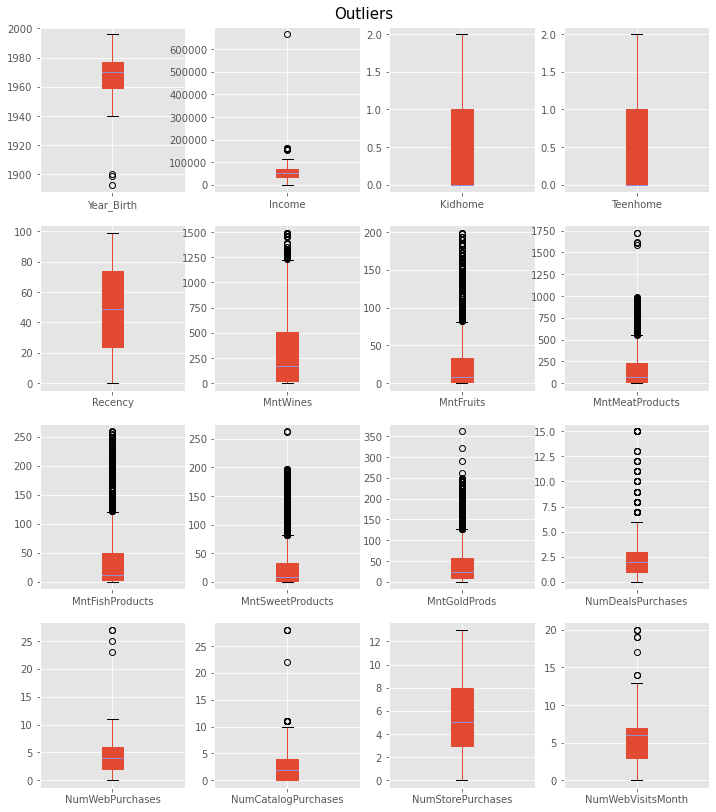

In [17]:
#Outliers
# select columns to plot
mrkt_to_plot = mrkt.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
mrkt_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

Multiple features contain outliers, but the only that likely indicate data entry errors are 
    Year_Birth <= 1900, so we'll simply drop these records.

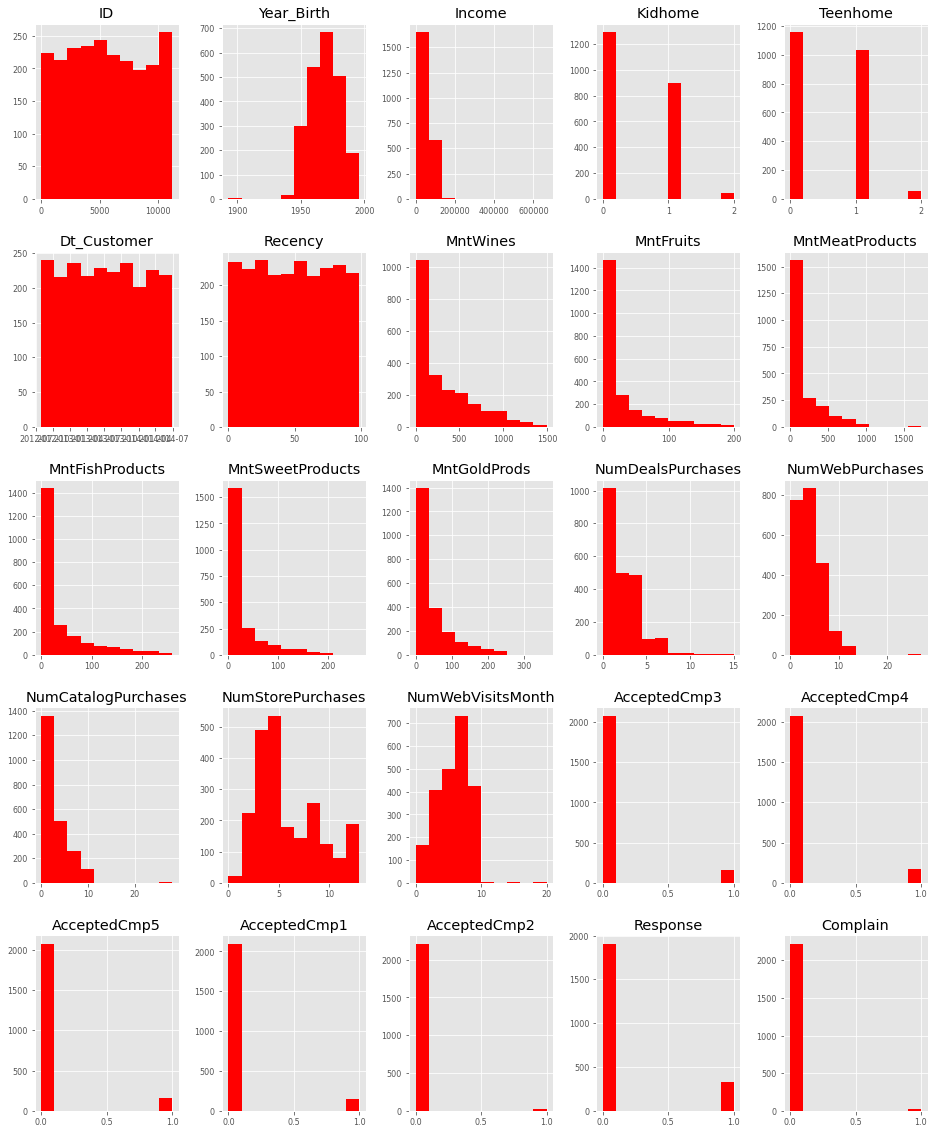

In [18]:
#Outliers for all the columns
mrkt.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8,color="Red")
plt.savefig('hist.png', bbox_inches='tight')

In [19]:
from scipy import stats
import seaborn as sns

In [20]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)

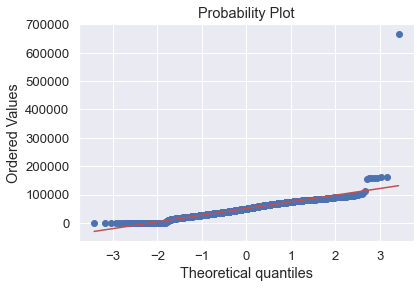

In [21]:
'''This Probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given 
plot function.'''

stats.probplot(mrkt['Income'], plot=sns.mpl.pyplot)
plt.show()

From the above it is seen that one person has an income of over 600,000 which is an anomaly. Since it's a single record, simply delete it.

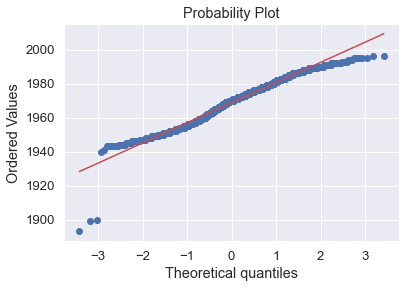

In [22]:
stats.probplot(mrkt['Year_Birth'],plot=sns.mpl.pyplot);

In [23]:
# Drop the Outliers
mrkt = mrkt[mrkt['Year_Birth'] > 1910].reset_index(drop=True)
mrkt = mrkt[mrkt['Income'] < 600000].reset_index(drop=True)

<AxesSubplot:>

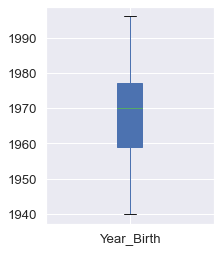

In [24]:
plt.figure(figsize=(3,4))
mrkt['Year_Birth'].plot(kind='box',patch_artist=True)

Another method to remove Outliers is:

mrkt = mrkt[mrkt.Year_Birth >= (mrkt.Year_Birth.mean()-3*mrkt.Year_Birth.std())]

In [25]:
mrkt.shape

(2236, 28)

#### 1.2 Are there any useful variables that you can engineer with the given data?
The Dt_Customer column has already been transformed to datetime format

Minorhome: The total number of minors can be engineered from the sum of "Kidhome" and "Teenhome"

Join_year: The year that person became a customer, which can be engineered from "Dt_Customer"

Join_month: The month that person became a customer, which can be engineered from "Dt_Customer"

Join_weekday: The day of the week that person became a customer, which can be engineered from "Dt_Customer"

Age: From "Year_Birth" we can derive Age

Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns

Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns

Total_accept: Total amount a customer accepted the offer in marketing campaign, acquired by summing up all the "Accepted"-related columns and the "Response" column

"AOV": AOV stands for the average order volumn of each customer, which can be engineerd by dividing Total_Mnt by Total_num_purchase

In [26]:
mrkt["Minorhome"] = mrkt.Kidhome + mrkt.Teenhome

mrkt["Join_year"] = mrkt.Dt_Customer.dt.year

mrkt["Join_month"] = mrkt.Dt_Customer.dt.month

mrkt["Join_weekday"] = mrkt.Dt_Customer.dt.weekday

year=dt.datetime.today().year
mrkt['Age']=year-mrkt['Year_Birth']

mrkt['Total_Mnt'] = mrkt.MntWines+ mrkt.MntFruits+ mrkt.MntMeatProducts+ mrkt.MntFishProducts+ mrkt.MntSweetProducts+ mrkt.MntGoldProds 

mrkt['Total_num_purchase'] = mrkt.NumDealsPurchases+ mrkt.NumWebPurchases+ mrkt.NumCatalogPurchases+ mrkt.NumStorePurchases+ mrkt.NumWebVisitsMonth 

mrkt['Total_accept'] = mrkt.AcceptedCmp1 + mrkt.AcceptedCmp2 + mrkt.AcceptedCmp2 + mrkt.AcceptedCmp2  + mrkt.AcceptedCmp3 + mrkt.AcceptedCmp4 + mrkt.AcceptedCmp5 + mrkt.Response

mrkt['AOV'] = mrkt.Total_Mnt/mrkt.Total_num_purchase

In [27]:
mrkt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Minorhome,Join_year,Join_month,Join_weekday,Age,Total_Mnt,Total_num_purchase,Total_accept,AOV
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,6,0,51,1190,16,1,74.375000
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,6,6,60,577,23,4,25.086957
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,5,1,63,251,13,0,19.307692
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,5,6,54,11,11,0,1.000000
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,4,1,32,91,15,2,6.066667


#### 1.3 Do you notice any patterns or anomalies in the data? Can you plot them?

We can make use of heatmap to to see the correlation between each variable. 

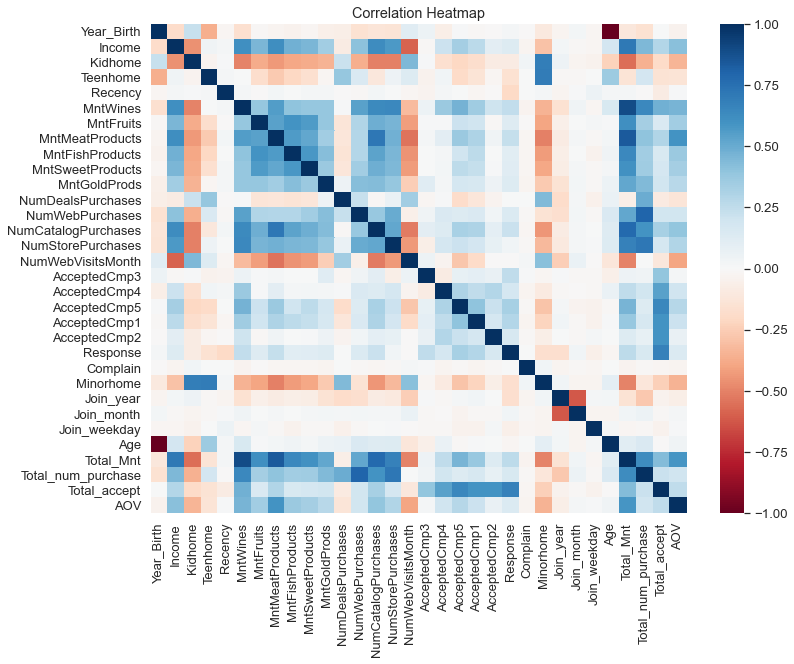

In [28]:
mrkt_to_plot = mrkt.drop(columns = ['ID'])

#Create a heatmap
plt.figure(figsize = (12,9))
m = sns.heatmap(mrkt_to_plot.corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0)
m.set_yticklabels(m.get_yticklabels(), rotation = 0, fontsize = 13)
m.set_xticklabels(m.get_yticklabels(), rotation = 90, fontsize = 13)
plt.title("Correlation Heatmap")
plt.savefig('Heatmap.png', bbox_inches = 'tight')
plt.show()

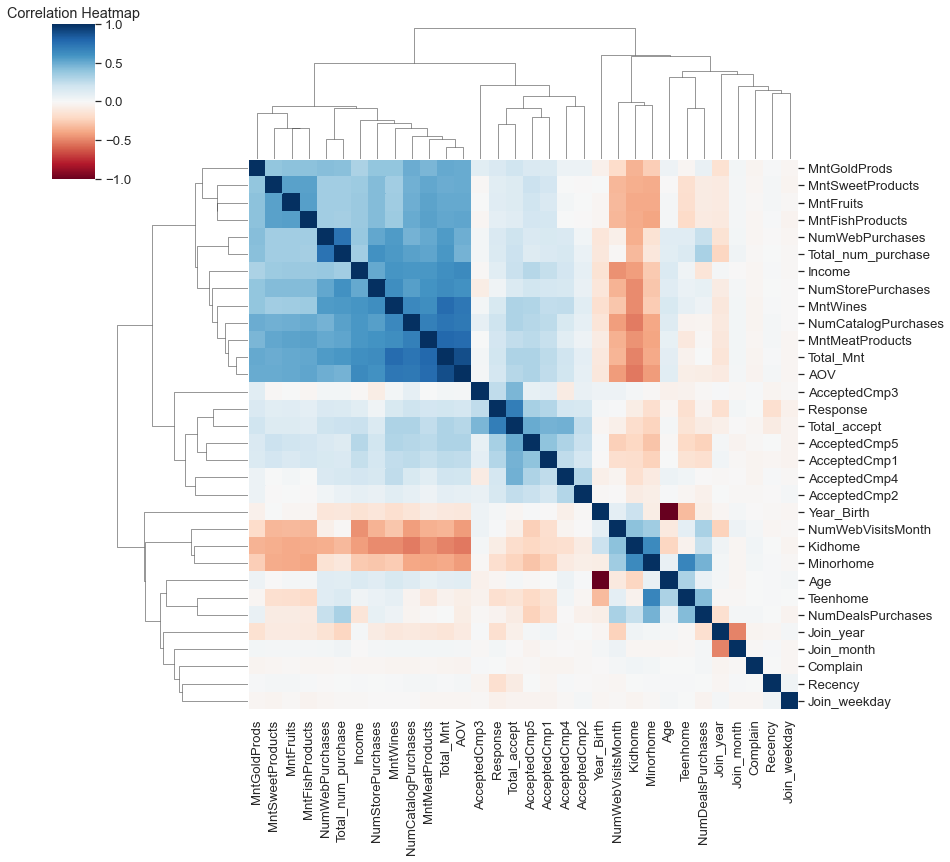

In [29]:
#A code snippet from another submission for this task made use of clustermap that I want to show here.
#Calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = mrkt.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='RdBu', center=0,figsize = (12,12))
plt.title("Correlation Heatmap")
plt.show()

#### Patterns Observed from Correlation Heatmap:
1. High Income People
   - Tend to spend more and purchase more.
   - Visit the company's website less frequently.
   - Made more purchase with Store, Catalog and Web.
   - Tend to have less number of purchases made with a discount.
   - Have high Meat and Wine Product purchases.


2. People having kids at home
   - Spend less and Purchase less.
   - Have high number of purchases made with a discount.
   - Visit Company's website moderately.
    
    
3. Advertising Campaign
   - Response (last campaign) seems to be the one with highest acceptance.
   - High Correlation between 'AcceptedCmp' and 'Response'.

### Anomalies:
   - The number of website visits per month ('NumWebVisitMonth') has a very low correlation with a web purchases ('NumWebPurchases')
   - 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that deals are an effective way of stimulating purchases on the website.
   - The number of Complain are very low throughout with slight correlation with 'kidhome'.

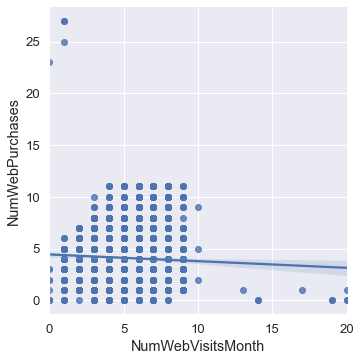

In [30]:
# Compare NumWebVisitsMonth with NumWebPurchases
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=mrkt);

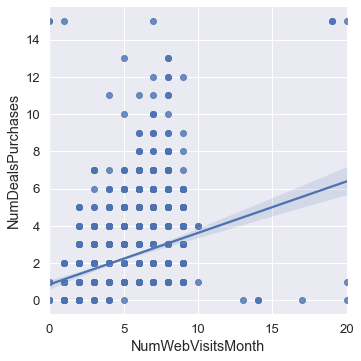

In [31]:
#Compare NumWebVisitsMonth with NumDealsPurchases
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=mrkt);

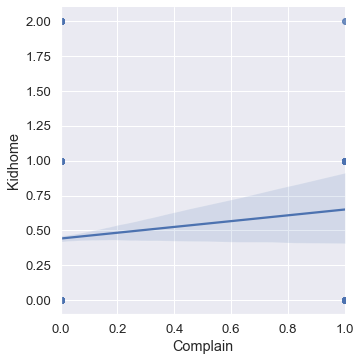

In [32]:
# Comapre Kidhome with Complain
sns.lmplot(x = 'Complain', y ='Kidhome',data = mrkt);

### Section 2 : Statistical Analysis

In [33]:
mrkt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Minorhome,Join_year,Join_month,Join_weekday,Age,Total_Mnt,Total_num_purchase,Total_accept,AOV
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,6,0,51,1190,16,1,74.375000
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,6,6,60,577,23,4,25.086957
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,5,1,63,251,13,0,19.307692
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,5,6,54,11,11,0,1.000000
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,4,1,32,91,15,2,6.066667


#### 2.1 What factors are significantly related to the number of store purchases?
We will use use a linear regression model with NumStorePurchases as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
Begin by plotting the target variable:

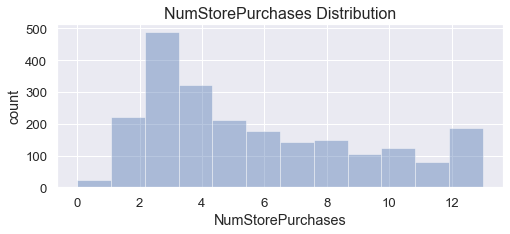

In [34]:
plt.figure(figsize = (8,3))
sns.distplot(mrkt['NumStorePurchases'], kde=False, hist= True, bins = 12)
plt.title('NumStorePurchases Distribution', size = 16)
plt.ylabel('count');

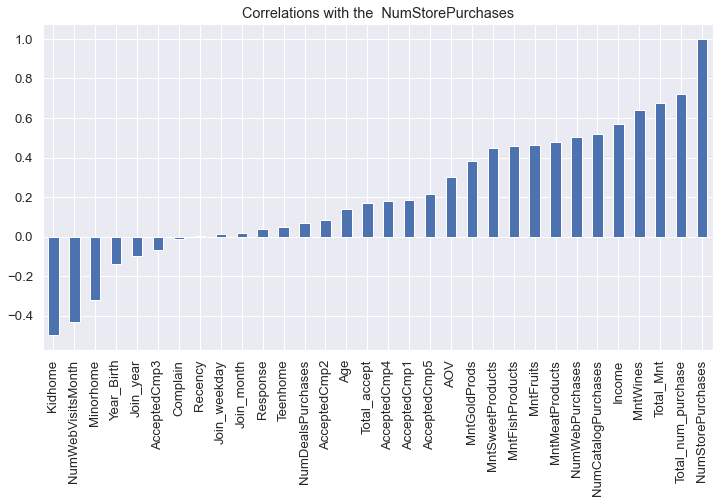

In [35]:
mrkt_num = mrkt.drop(columns = ['ID','Dt_Customer']).select_dtypes(include = ['float64','int64'])

corr_with_SalePrice = mrkt_num.corr()
plot_data = corr_with_SalePrice["NumStorePurchases"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with the  NumStorePurchases")
plt.show()

From the figure above we have 
1. Total amount spent in the last two years 
2. Average order volume 
3. Total number of purchases in the last two years 
4. Amount spent on wine in the last 2 years 
5. Number of purchases made using a catalog 
6. Number of visits to company's web site in the last month 
7. Total number of purchases through website in the last two years

Text(0.5, 1.0, 'Distribution of the number of store Purchases')

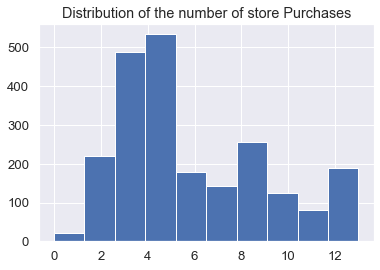

In [36]:
mrkt_num.NumStorePurchases.hist()
plt.title("Distribution of the number of store Purchases")

In [37]:
# One-hot encoding
mrkt_num = pd.get_dummies(mrkt_num)
mrkt_num.replace([np.inf, -np.inf], 0, inplace=True)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=mrkt_num.drop(columns=['NumStorePurchases'])  # Features
y=mrkt_num['NumStorePurchases']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7488301043219076
Mean Squared Error: 1.2859022727272729
Root Mean Squared Error: 1.133976310478871


In [38]:
mrkt['NumStorePurchases'].max()

13

The range of NumStorePurchases is 13, and the RMS is only 1.1, which is less the 10% of the range, making it a reliable model.

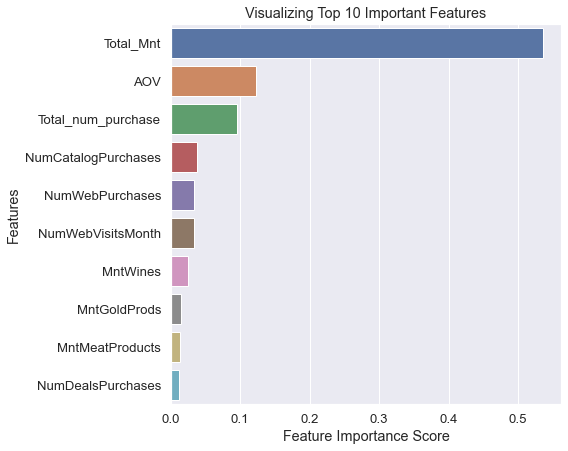

In [39]:
#Find the feature importance scores
feature_imp = pd.Series(rg.feature_importances_,
                       index = list(X.columns)).sort_values(ascending = False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

 98%|===================| 660/671 [00:25<00:00]        

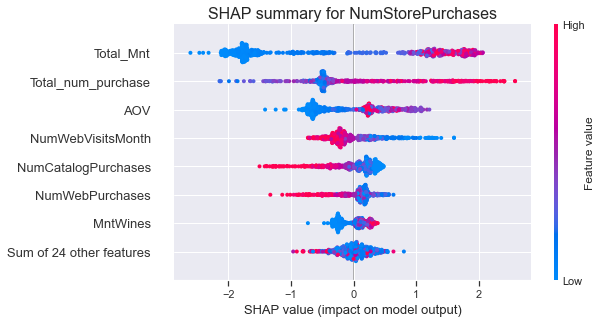

<Figure size 432x288 with 0 Axes>

In [40]:
import shap 

ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for NumStorePurchases', size = 16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('SHAP.png', bbox_inches='tight')
plt.show()

1. The Number of Store Purchases increases with higher total amount spent, higher total purchase amount, higher AOV and higher amount of wines purchases. 
2. The Number of Store Purchase decreases with higher number of website visits, higher number of purchases through catalog, and higher Number of Purchases through websites.

Summary: People who mostly shop at store tend to buy more wines, have higher average order volumne, and shop less through internet or catalog. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


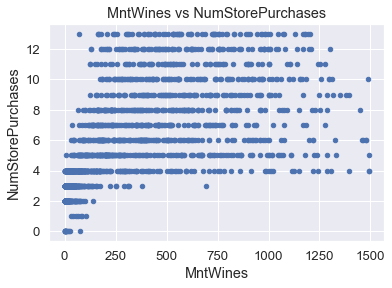

In [41]:
mrkt.plot(x = 'MntWines', y = 'NumStorePurchases', kind = 'scatter')
plt.title('MntWines vs NumStorePurchases')
plt.show()

#### 2.2 Does US fare significantly better than the Rest of the World in terms of total purchases?

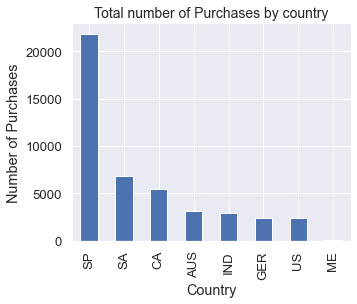

In [42]:
plt.figure(figsize = (5,4))
mrkt.groupby('Country')['Total_num_purchase'].sum().sort_values(ascending = False). plot(kind = 'bar')
plt.title('Total number of Purchases by country', size = 14)
plt.ylabel('Number of Purchases')
plt.show()

- Plot Findings
    - Spain has the highest number of purchases
    - US is in the penultimate position, so US doesn't fare better than the rest of the world in terms of total number of purchases 

#### 2.3 Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


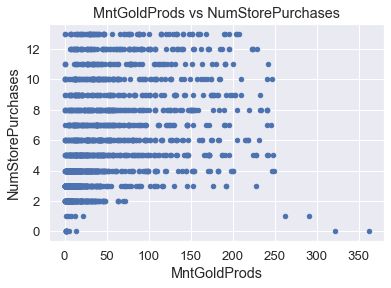

In [43]:
# Visualizing MntGoldProds vs NumStorePurchases with scatter plot
mrkt_num.plot(x='MntGoldProds', y='NumStorePurchases', kind='scatter')
plt.title("MntGoldProds vs NumStorePurchases");
plt.savefig('MntGoldProds vs NumStorePurchases.png', bbox_inches='tight')

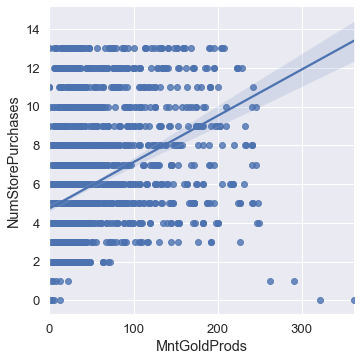

In [44]:
# Lets do it using lmplot
sns.lmplot(x = 'MntGoldProds', y = 'NumStorePurchases', data = mrkt_num)

In [45]:
# Lets perform pearson correlation for this
from scipy.stats import pearsonr

r, p_value = pearsonr(x = mrkt_num['MntGoldProds'], y = mrkt_num['NumStorePurchases'])

print('Pearson Correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson Correlation (r):  0.38312364850278374
Pearson p-value:  4.3244968416135924e-79


- Above Findings give us the Correlation and p value
    - Correlation (r) : 0.3831
    - P-value (p) : 4.324e-79
- Since p value is < 0.05 we can say that they are correlated positively

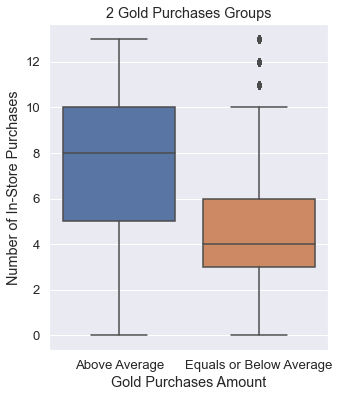

In [46]:
#Lets prove it with above avg spend on gold box plots
gold_above_avg = mrkt_num[mrkt_num.MntGoldProds > mrkt_num.MntGoldProds.mean()]
gold_above_avg['Gold Purchases Amount'] = "Above Average"
gold_equ_or_below_avg =  mrkt_num[mrkt_num.MntGoldProds <= mrkt_num.MntGoldProds.mean()]
gold_equ_or_below_avg['Gold Purchases Amount'] = "Equals or Below Average"

plt.figure(figsize = (5, 6))
mrkt_gold = gold_above_avg.append(gold_equ_or_below_avg)
plt.title("2 Gold Purchases Groups")
sns.boxplot(data = mrkt_gold, x = 'Gold Purchases Amount', y = 'NumStorePurchases')
plt.ylabel("Number of In-Store Purchases");

#### 2.4 Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

Is there a significant relationship between geographical regional and success of a campaign?

In [47]:
mrkt.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Minorhome',
       'Join_year', 'Join_month', 'Join_weekday', 'Age', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

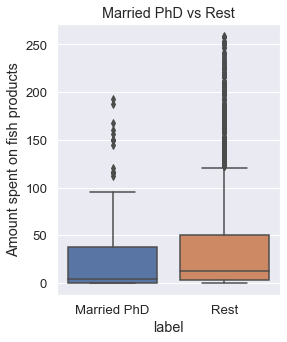

In [48]:
#Create two groups
m_phd = mrkt[(mrkt.Education == "PhD") & (mrkt.Marital_Status == "Married")]
m_phd['label'] = "Married PhD"
rest = mrkt[(mrkt.Education != "PhD") | (mrkt.Marital_Status != "Married")]
rest['label'] = "Rest"

df_combined = m_phd.append(rest)
plt.figure(figsize = (4, 5))
plt.title("Married PhD vs Rest")
sns.boxplot(data = df_combined, x = 'label', y = 'MntFishProducts')
plt.ylabel("Amount spent on fish products")
plt.savefig('Married PhD vs Rest.png', bbox_inches='tight')

In [49]:
# Use the t-test to test these two groups if they have the mean (expected)
from scipy.stats import ttest_ind

#This test assumes that the populations have identical variances by default.
pval = ttest_ind(m_phd.MntFishProducts, rest.MntFishProducts).pvalue
print("T-test p-value: ", pval)

T-test p-value:  0.005246107140504445


- From T-test, we have a p-value of 0.0052
    - Since p value is less than 0.05, we can reject the null hypothesis, that their means are different.
    - We can even see from the box plot that Married PhD's mean is lower than the Rest.

### Section 3 : Data Visualization

#### 3.1 Which marketing campaign is most successful?

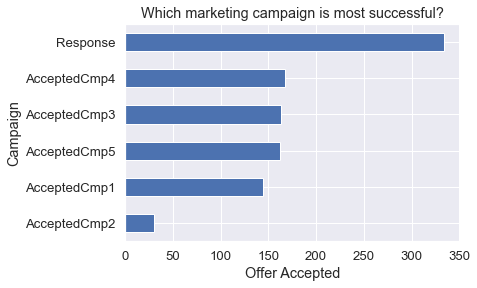

In [50]:
mrkt[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
plt.savefig('Which marketing campaign is most successful.png', bbox_inches='tight')

From the above bar graph, we can see that the Last campaign was the most successful (As Response was the reply to the last campaign).

#### 3.2 What does the average customer look like for this company?

In [51]:
mrkt.replace([np.inf, -np.inf], 0, inplace=True)

In [52]:
mrkt.mean()

ID                      5589.008497
Year_Birth              1968.898032
Income                 50389.036476
Kidhome                    0.444097
Teenhome                   0.506708
Recency                   49.116279
MntWines                 304.127460
MntFruits                 26.275939
MntMeatProducts          166.983453
MntFishProducts           37.536225
MntSweetProducts          27.080501
MntGoldProds              43.983005
NumDealsPurchases          2.326029
NumWebPurchases            4.087657
NumCatalogPurchases        2.663238
NumStorePurchases          5.795617
NumWebVisitsMonth          5.318873
AcceptedCmp3               0.072898
AcceptedCmp4               0.074687
AcceptedCmp5               0.072451
AcceptedCmp1               0.064401
AcceptedCmp2               0.013417
Response                   0.149374
Complain                   0.008945
Minorhome                  0.950805
Join_year               2013.027728
Join_month                 6.466011
Join_weekday               2

An Average Customer..

 - is 52 years old
 - was born in 1968
 - has annual income of over 50000 dollars
 - has purchased 49 days ago
 - has spend 605 dollars
 - joined in 2013 around mid-June and on Wednesday
 - spents most on Wines(304) followed by Meat(167)

#### 3.3 Which products are performing best?

In [53]:
mrkt_prods = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

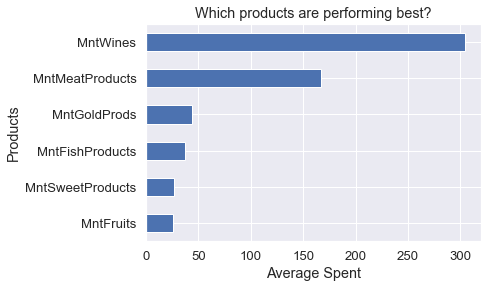

In [54]:
mrkt[mrkt_prods].mean().sort_values().plot.barh()
plt.title("Which products are performing best?")
plt.xlabel("Average Spent");
plt.ylabel("Products")
plt.savefig('Which products are performing best.png', bbox_inches='tight')

The Best Perfoming products are as follows :
   - MntWines
   - MntMeatProducts 
   - MntGoldProds
   - MntFishProducts 
   - MntSweetProducts 
   - MntFruits 

#### 3.4 Which channels are underperforming?

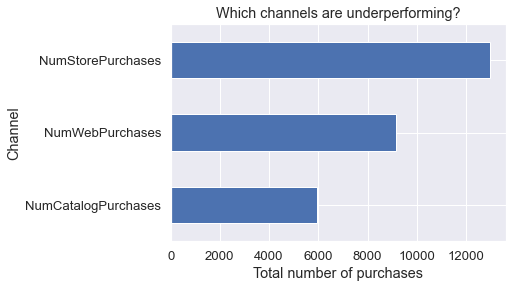

In [55]:
mrkt[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel")
plt.show()

- Channels: 
     - The Store Purchases are highest with ~13000 
     - Web Purchases are with 9140
     - Catalog Purchases at last with ~6000

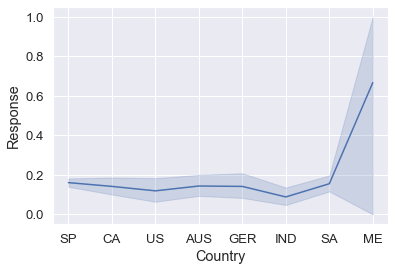

In [56]:
# Most recent Campaign's record with each country
sns.lineplot(x = 'Country', y = 'Response', data = mrkt)
plt.show()

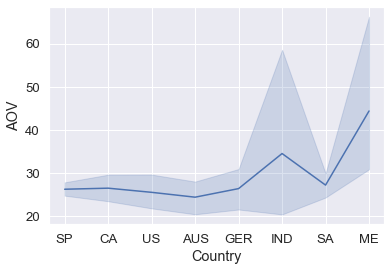

In [57]:
# Plotting Country with Average Order Volume
sns.lineplot(x = 'Country', y = 'AOV', data = mrkt)
plt.show()

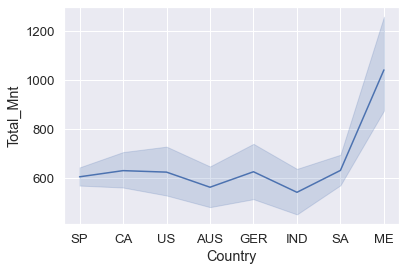

In [58]:
sns.lineplot(x = 'Country', y = 'Total_Mnt', data = mrkt)
plt.show()

In [59]:
mrkt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Minorhome,Join_year,Join_month,Join_weekday,Age,Total_Mnt,Total_num_purchase,Total_accept,AOV
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,6,0,51,1190,16,1,74.375000
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,6,6,60,577,23,4,25.086957
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,5,1,63,251,13,0,19.307692
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,5,6,54,11,11,0,1.000000
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,4,1,32,91,15,2,6.066667


### Section 04 : Conclusion

Summaries of insights:

   - The best performing Channels are web and Store purchases.
   - Underperforming Channels are deals and Catalog purchases.
    
    
 - People having kids at home are less valuable customers as they tend to purchase less
   - tend to has a high number of purchases made with a discount
   - Have high number of purchases made with a discount.
   - Visit Company's website moderately.
    
    
 - Most Successful products are wines and meats
 - Sweets, Gold, Fish and Fruits were the least successful
   
   
 - Married people with PhD don't spend more on Fish products
 - High Income People spend and purchase more


 - Advertising Campaign
   - Response (last campaign) seems to be the one with highest acceptance.


 - Countries
   - The most recent campaign had the best response in Mexico(> 60% acceptance rate)
   - Mexico and India have the highest Average Order Volume, but India seems to spend less than all countries.

Suggested Action:
    
   - Focus advertising campaigns on the more successful channels, to reach more customers.
   - Keep using the same marketing techniques in the last campaign, but with a focus on promoting meat products and wines.
   - Conduct future advertising campaigns using the same model recently implemented in Mexico.
   - Have a brand discount day on Thursday or a brand discount month in June to attract new customers. 
   - Focus advertising campaigns on boosting sales of the less popular items.
   - Create new marketing campaign for customers with children using the companies website more often.